symbol,PANW
timestamp,
2022-07-01 04:00:00+00:00,508.25
2022-07-05 04:00:00+00:00,521.14
2022-07-06 04:00:00+00:00,514.96
2022-07-07 04:00:00+00:00,517.25
2022-07-08 04:00:00+00:00,524.22


symbol,PANW
timestamp,
2023-06-26 04:00:00+00:00,243.80
2023-06-27 04:00:00+00:00,251.59
2023-06-28 04:00:00+00:00,253.41
2023-06-29 04:00:00+00:00,253.33
2023-06-30 04:00:00+00:00,255.52


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,508.25,508.250000,508.250000,508.250000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,521.14,515.190769,515.017250,514.759450,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,514.96,515.101732,514.996228,514.827641,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,517.25,515.768570,515.646857,515.451519,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,524.22,518.015484,517.720628,517.276057,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,243.80,236.426748,230.118618,203.373723,1.0,0.0,28.0,0.0,6826.40,-1117.24,5709.16,-0.000686
2023-06-27 04:00:00+00:00,251.59,238.592927,232.163511,204.335242,1.0,0.0,28.0,0.0,7044.52,-1117.24,5927.28,0.038205
2023-06-28 04:00:00+00:00,253.41,240.709652,234.186986,205.313745,1.0,0.0,28.0,0.0,7095.48,-1117.24,5978.24,0.008598


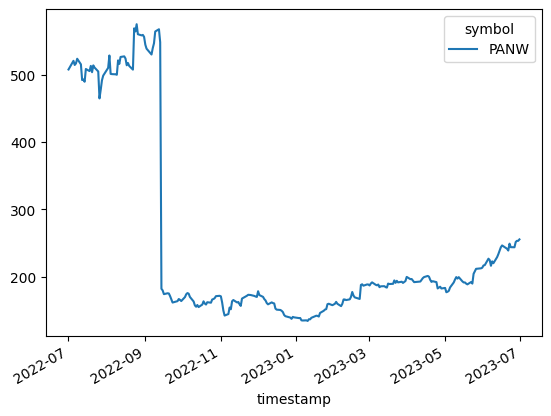

In [266]:
#GROWTH STOCKS PORTFOLIO:

#Each portfolio contains a starting amount of $100000 dvided equally between all stocks in the portfolio
    #EMA triple cross strategy being used to make trade decisions
    #There are 7 stocks in this portfolio therefore $14285 in each stock
    #Ideally share amount/trade would being dynamic, continuousily dividing $14285 by the current price to avoid using more funds than are dedicated for that stock. 
    #For the purpose of this exercise we will use $14285 divided by the price on th start date to determine share amount/trade.
    
    
import pandas as pd 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import math
import os
import requests
import yfinance as yf
import cerebro
import backtrader as bt
from datetime import datetime
from finta import TA
%matplotlib inline

alpaca_api_key = "PKRALAY7BXD8GDXWX8UN"
alpaca_secret_key = "dbJpTfuZKlQQ048BNoOhL4kRZBnl1eFsOYsdMnP6"
alpaca_endpoint = "https://paper-api.alpaca.markets"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url = alpaca_endpoint)

ticker = ["PANW"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_1 = ticker_data.loc[:,["close"]]
stock_df_1 = ticker_data[["close","symbol"]]
stock_df_1 = stock_df_1.pivot(columns='symbol', values='close')
stock_df_1.plot()

ema_signals_df_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_1 ["EMA13"] = stock_df_1["PANW"].ewm(span=short_window).mean()
ema_signals_df_1 ["EMA20"] = stock_df_1["PANW"].ewm(span=middle_window).mean()
ema_signals_df_1 ["EMA100"] = stock_df_1["PANW"].ewm(span=long_window).mean()
display(stock_df_1.head())
display(stock_df_1.tail())

ema_signals_df_1["Signal"] = 0.0
ema_signals_df_1["Signal"][short_window:] = np.where(
    ema_signals_df_1["EMA13"][short_window:] > ema_signals_df_1["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_1["Signal"][short_window:] = np.where(
    ema_signals_df_1["EMA13"][short_window:] > ema_signals_df_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_1["Signal"][short_window:] = np.where(
    ema_signals_df_1["EMA20"][short_window:] > ema_signals_df_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_1["Entry/Exit"] = ema_signals_df_1["Signal"].diff()

ema_signals_df_1.head(2556)


initial_capital = float(14285)
share_size = 28

ema_signals_df_1["Position"] = share_size * ema_signals_df_1["Signal"]
ema_signals_df_1.tail(2556)

ema_signals_df_1["Entry/Exit Position"] = ema_signals_df_1["Position"].diff()
ema_signals_df_1.tail(2556)

ema_signals_df_1["Portfolio Holdings"] = ema_signals_df_1["close"] * ema_signals_df_1["Position"]
ema_signals_df_1.tail(2556)

ema_signals_df_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_1["close"] * ema_signals_df_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df_1.tail(2556)

ema_signals_df_1["Portfolio Total"] = ema_signals_df_1["Portfolio Cash"] + ema_signals_df_1["Portfolio Holdings"]
ema_signals_df_1.tail(2556)

ema_signals_df_1["Portfolio Daily Returns"] = ema_signals_df_1["Portfolio Total"].pct_change()
ema_signals_df_1.tail(2556)

symbol,AAPL
timestamp,
2022-07-01 04:00:00+00:00,138.93
2022-07-05 04:00:00+00:00,141.56
2022-07-06 04:00:00+00:00,142.92
2022-07-07 04:00:00+00:00,146.35
2022-07-08 04:00:00+00:00,147.04


symbol,AAPL
timestamp,
2023-06-26 04:00:00+00:00,185.27
2023-06-27 04:00:00+00:00,188.06
2023-06-28 04:00:00+00:00,189.25
2023-06-29 04:00:00+00:00,189.59
2023-06-30 04:00:00+00:00,193.88


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,138.93,138.930000,138.930000,138.930000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,141.56,140.346154,140.310750,140.258150,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,142.92,141.339213,141.268851,141.163238,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,146.35,142.894597,142.735700,142.499086,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,147.04,143.996702,143.776874,143.443955,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,185.27,183.738449,181.962296,167.348960,1.0,0.0,103.0,0.0,19082.81,-1950.89,17131.92,-0.008406
2023-06-27 04:00:00+00:00,188.06,184.355814,182.543030,167.761976,1.0,0.0,103.0,0.0,19370.18,-1950.89,17419.29,0.016774
2023-06-28 04:00:00+00:00,189.25,185.054983,183.181789,168.190426,1.0,0.0,103.0,0.0,19492.75,-1950.89,17541.86,0.007036


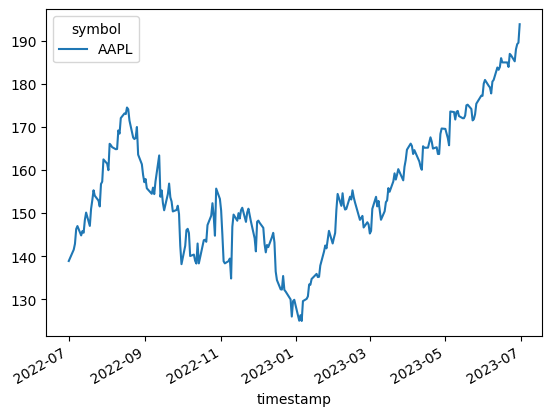

In [267]:
ticker = ["AAPL"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_2 = ticker_data.loc[:,["close"]]
stock_df_2 = ticker_data[["close","symbol"]]
stock_df_2 = stock_df_2.pivot(columns='symbol', values='close')
stock_df_2.plot()

ema_signals_df_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_2 ["EMA13"] = stock_df_2["AAPL"].ewm(span=short_window).mean()
ema_signals_df_2 ["EMA20"] = stock_df_2["AAPL"].ewm(span=middle_window).mean()
ema_signals_df_2 ["EMA100"] = stock_df_2["AAPL"].ewm(span=long_window).mean()
display(stock_df_2.head())
display(stock_df_2.tail())

ema_signals_df_2["Signal"] = 0.0
ema_signals_df_2["Signal"][short_window:] = np.where(
    ema_signals_df_2["EMA13"][short_window:] > ema_signals_df_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_2["Signal"][short_window:] = np.where(
    ema_signals_df_2["EMA13"][short_window:] > ema_signals_df_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_2["Signal"][short_window:] = np.where(
    ema_signals_df_2["EMA20"][short_window:] > ema_signals_df_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_2["Entry/Exit"] = ema_signals_df_2["Signal"].diff()

ema_signals_df_2.head(2556)


initial_capital = float(14285)
share_size = 103

ema_signals_df_2["Position"] = share_size * ema_signals_df_2["Signal"]
ema_signals_df_2.tail(2556)

ema_signals_df_2["Entry/Exit Position"] = ema_signals_df_2["Position"].diff()
ema_signals_df_2.tail(2556)

ema_signals_df_2["Portfolio Holdings"] = ema_signals_df_2["close"] * ema_signals_df_2["Position"]
ema_signals_df_2.tail(2556)

ema_signals_df_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_2["close"] * ema_signals_df_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_2.tail(2556)

ema_signals_df_2["Portfolio Total"] = ema_signals_df_2["Portfolio Cash"] + ema_signals_df_2["Portfolio Holdings"]
ema_signals_df_2.tail(2556)

ema_signals_df_2["Portfolio Daily Returns"] = ema_signals_df_2["Portfolio Total"].pct_change()
ema_signals_df_2.tail(2556)

symbol,AMZN
timestamp,
2022-07-01 04:00:00+00:00,109.56
2022-07-05 04:00:00+00:00,113.50
2022-07-06 04:00:00+00:00,114.33
2022-07-07 04:00:00+00:00,116.33
2022-07-08 04:00:00+00:00,115.54


symbol,AMZN
timestamp,
2023-06-26 04:00:00+00:00,127.33
2023-06-27 04:00:00+00:00,129.18
2023-06-28 04:00:00+00:00,129.04
2023-06-29 04:00:00+00:00,127.90
2023-06-30 04:00:00+00:00,130.36


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,109.56,109.560000,109.560000,109.560000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,113.50,111.681538,111.628500,111.549700,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,114.33,112.703386,112.620475,112.495063,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,116.33,113.829113,113.691357,113.482749,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,115.54,114.283973,114.138528,113.910820,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,127.33,125.996132,124.153450,110.767040,1.0,0.0,131.0,0.0,16680.23,549.65,17229.88,-0.014978
2023-06-27 04:00:00+00:00,129.18,126.450970,124.632169,111.134228,1.0,0.0,131.0,0.0,16922.58,549.65,17472.23,0.014066
2023-06-28 04:00:00+00:00,129.04,126.820831,125.051963,111.491251,1.0,0.0,131.0,0.0,16904.24,549.65,17453.89,-0.001050


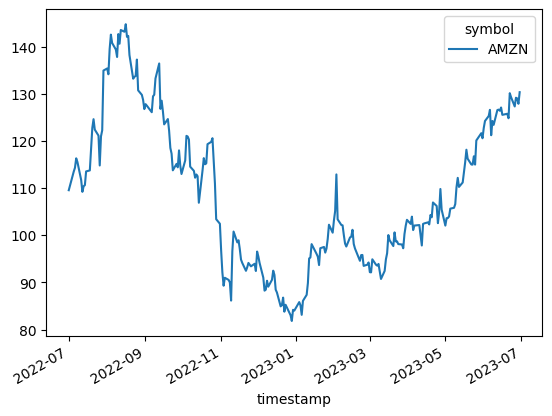

In [268]:
ticker = ['AMZN']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_3 = ticker_data.loc[:,["close"]]
stock_df_3 = ticker_data[["close","symbol"]]
stock_df_3 = stock_df_3.pivot(columns='symbol', values='close')
stock_df_3.plot()

ema_signals_df_3 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_3 ["EMA13"] = stock_df_3['AMZN'].ewm(span=short_window).mean()
ema_signals_df_3 ["EMA20"] = stock_df_3['AMZN'].ewm(span=middle_window).mean()
ema_signals_df_3 ["EMA100"] = stock_df_3['AMZN'].ewm(span=long_window).mean()
display(stock_df_3.head())
display(stock_df_3.tail())

ema_signals_df_3["Signal"] = 0.0
ema_signals_df_3["Signal"][short_window:] = np.where(
    ema_signals_df_3["EMA13"][short_window:] > ema_signals_df_3["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_3["Signal"][short_window:] = np.where(
    ema_signals_df_3["EMA13"][short_window:] > ema_signals_df_3["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_3["Signal"][short_window:] = np.where(
    ema_signals_df_3["EMA20"][short_window:] > ema_signals_df_3["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_3["Entry/Exit"] = ema_signals_df_3["Signal"].diff()

ema_signals_df_3.head(2556)


initial_capital = float(14285)
share_size = 131

ema_signals_df_3["Position"] = share_size * ema_signals_df_3["Signal"]
ema_signals_df_3.tail(2556)

ema_signals_df_3["Entry/Exit Position"] = ema_signals_df_3["Position"].diff()
ema_signals_df_3.tail(2556)

ema_signals_df_3["Portfolio Holdings"] = ema_signals_df_3["close"] * ema_signals_df_3["Position"]
ema_signals_df_3.tail(2556)

ema_signals_df_3["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_3["close"] * ema_signals_df_3["Entry/Exit Position"]).cumsum()
)
ema_signals_df_3.tail(2556)

ema_signals_df_3["Portfolio Total"] = ema_signals_df_3["Portfolio Cash"] + ema_signals_df_3["Portfolio Holdings"]
ema_signals_df_3.tail(2556)
ema_signals_df_3["Portfolio Daily Returns"] = ema_signals_df_3["Portfolio Total"].pct_change()
ema_signals_df_3.tail(2556)

symbol,MSFT
timestamp,
2022-07-01 04:00:00+00:00,259.58
2022-07-05 04:00:00+00:00,262.85
2022-07-06 04:00:00+00:00,266.21
2022-07-07 04:00:00+00:00,268.40
2022-07-08 04:00:00+00:00,267.66


symbol,MSFT
timestamp,
2023-06-26 04:00:00+00:00,328.60
2023-06-27 04:00:00+00:00,334.57
2023-06-28 04:00:00+00:00,335.85
2023-06-29 04:00:00+00:00,335.05
2023-06-30 04:00:00+00:00,340.41


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,259.58,259.580000,259.580000,259.580000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,262.85,261.340769,261.296750,261.231350,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,266.21,263.219449,263.100866,262.924201,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,268.40,264.827529,264.630644,264.334490,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,267.66,265.580576,265.363419,265.026459,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,328.60,334.043668,331.452091,298.706108,1.0,0.0,55.0,0.0,18073.00,-2235.35,15837.65,-0.021809
2023-06-27 04:00:00+00:00,334.57,334.118859,331.749034,299.421299,1.0,0.0,55.0,0.0,18401.35,-2235.35,16166.00,0.020732
2023-06-28 04:00:00+00:00,335.85,334.366165,332.139602,300.147652,1.0,0.0,55.0,0.0,18471.75,-2235.35,16236.40,0.004355


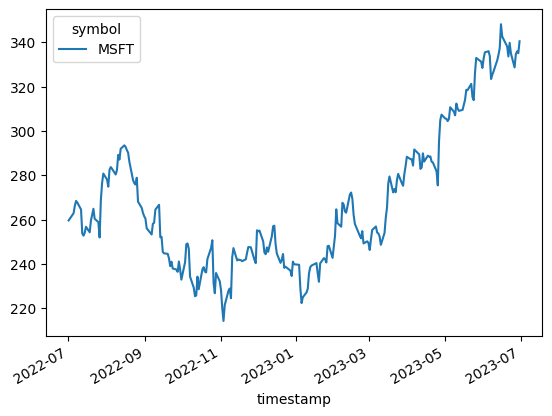

In [269]:
ticker = ['MSFT']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_4 = ticker_data.loc[:,["close"]]
stock_df_4 = ticker_data[["close","symbol"]]
stock_df_4 = stock_df_4.pivot(columns='symbol', values='close')
stock_df_4.plot()

ema_signals_df_4 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_4 ["EMA13"] = stock_df_4['MSFT'].ewm(span=short_window).mean()
ema_signals_df_4 ["EMA20"] = stock_df_4['MSFT'].ewm(span=middle_window).mean()
ema_signals_df_4 ["EMA100"] = stock_df_4['MSFT'].ewm(span=long_window).mean()
display(stock_df_4.head())
display(stock_df_4.tail())

ema_signals_df_4["Signal"] = 0.0
ema_signals_df_4["Signal"][short_window:] = np.where(
    ema_signals_df_4["EMA13"][short_window:] > ema_signals_df_4["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_4["Signal"][short_window:] = np.where(
    ema_signals_df_4["EMA13"][short_window:] > ema_signals_df_4["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_4["Signal"][short_window:] = np.where(
    ema_signals_df_4["EMA20"][short_window:] > ema_signals_df_4["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_4["Entry/Exit"] = ema_signals_df_4["Signal"].diff()

ema_signals_df_4.head(2556)


initial_capital = float(14285)
share_size = 55

ema_signals_df_4["Position"] = share_size * ema_signals_df_4["Signal"]
ema_signals_df_4.tail(2556)

ema_signals_df_4["Entry/Exit Position"] = ema_signals_df_4["Position"].diff()
ema_signals_df_4.tail(2556)

ema_signals_df_4["Portfolio Holdings"] = ema_signals_df_4["close"] * ema_signals_df_4["Position"]
ema_signals_df_4.tail(2556)

ema_signals_df_4["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_4["close"] * ema_signals_df_4["Entry/Exit Position"]).cumsum()
)
ema_signals_df.tail(2556)

ema_signals_df_4["Portfolio Total"] = ema_signals_df_4["Portfolio Cash"] + ema_signals_df_4["Portfolio Holdings"]
ema_signals_df_4.tail(2556)

ema_signals_df_4["Portfolio Daily Returns"] = ema_signals_df_4["Portfolio Total"].pct_change()
ema_signals_df_4.tail(2556)

symbol,TSLA
timestamp,
2022-07-01 04:00:00+00:00,681.79
2022-07-05 04:00:00+00:00,699.20
2022-07-06 04:00:00+00:00,695.20
2022-07-07 04:00:00+00:00,733.63
2022-07-08 04:00:00+00:00,752.29


symbol,TSLA
timestamp,
2023-06-26 04:00:00+00:00,241.05
2023-06-27 04:00:00+00:00,250.21
2023-06-28 04:00:00+00:00,256.24
2023-06-29 04:00:00+00:00,257.50
2023-06-30 04:00:00+00:00,261.77


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,681.79,681.790000,681.790000,681.790000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,699.20,691.164615,690.930250,690.582050,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,NaN
2022-07-06 04:00:00+00:00,695.20,692.721575,692.498077,692.152255,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-07 04:00:00+00:00,733.63,705.419846,704.372227,702.834827,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-08 04:00:00+00:00,752.29,717.880840,715.963128,713.125419,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,241.05,247.594243,237.799792,204.313636,1.0,0.0,20.0,0.0,4821.0,-607.8,4213.2,-0.068536
2023-06-27 04:00:00+00:00,250.21,247.967922,238.981717,205.228892,1.0,0.0,20.0,0.0,5004.2,-607.8,4396.4,0.043482
2023-06-28 04:00:00+00:00,256.24,249.149648,240.625363,206.246004,1.0,0.0,20.0,0.0,5124.8,-607.8,4517.0,0.027432


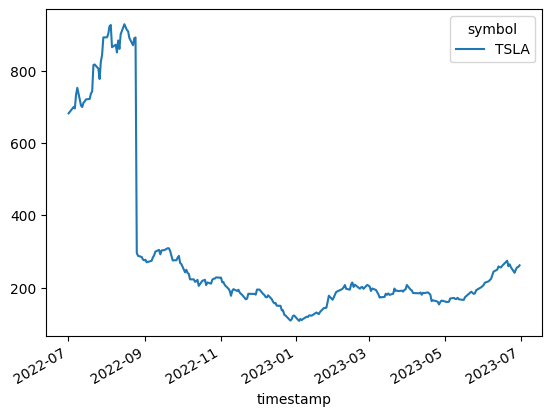

In [276]:
ticker = ['TSLA']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_5 = ticker_data.loc[:,["close"]]
stock_df_5 = ticker_data[["close","symbol"]]
stock_df_5 = stock_df_5.pivot(columns='symbol', values='close')
stock_df_5.plot()

ema_signals_df_5 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_5 ["EMA13"] = stock_df_5['TSLA'].ewm(span=short_window).mean()
ema_signals_df_5 ["EMA20"] = stock_df_5['TSLA'].ewm(span=middle_window).mean()
ema_signals_df_5 ["EMA100"] = stock_df_5['TSLA'].ewm(span=long_window).mean()
display(stock_df_5.head())
display(stock_df_5.tail())

ema_signals_df_5["Signal"] = 0.0
ema_signals_df_5["Signal"][short_window:] = np.where(
    ema_signals_df_5["EMA13"][short_window:] > ema_signals_df_5["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_5["Signal"][short_window:] = np.where(
    ema_signals_df_5["EMA13"][short_window:] > ema_signals_df_5["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_5["Signal"][short_window:] = np.where(
    ema_signals_df_5["EMA20"][short_window:] > ema_signals_df_5["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_5["Entry/Exit"] = ema_signals_df_5["Signal"].diff()

ema_signals_df_5.head(2556)


initial_capital = float(14285)
share_size = 20

ema_signals_df_5["Position"] = share_size * ema_signals_df_5["Signal"]
ema_signals_df_5.tail(2556)

ema_signals_df_5["Entry/Exit Position"] = ema_signals_df_5["Position"].diff()
ema_signals_df_5.tail(2556)

ema_signals_df_5["Portfolio Holdings"] = ema_signals_df_5["close"] * ema_signals_df_5["Position"]
ema_signals_df_5.tail(2556)

ema_signals_df_5["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_5["close"] * ema_signals_df_5["Entry/Exit Position"]).cumsum()
)
ema_signals_df_5.tail(2556)

ema_signals_df_5["Portfolio Total"] = ema_signals_df_5["Portfolio Cash"] + ema_signals_df_5["Portfolio Holdings"]
ema_signals_df_5.tail(2556)

ema_signals_df_5["Portfolio Daily Returns"] = ema_signals_df_5["Portfolio Total"].pct_change()
ema_signals_df_5.tail(2556)


symbol,CAT
timestamp,
2022-07-01 04:00:00+00:00,178.29
2022-07-05 04:00:00+00:00,173.76
2022-07-06 04:00:00+00:00,172.31
2022-07-07 04:00:00+00:00,180.28
2022-07-08 04:00:00+00:00,179.10


symbol,CAT
timestamp,
2023-06-26 04:00:00+00:00,236.95
2023-06-27 04:00:00+00:00,240.69
2023-06-28 04:00:00+00:00,241.87
2023-06-29 04:00:00+00:00,244.24
2023-06-30 04:00:00+00:00,246.05


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,178.29,178.290000,178.290000,178.290000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,173.76,175.850769,175.911750,176.002350,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,NaN
2022-07-06 04:00:00+00:00,172.31,174.484646,174.589209,174.746870,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-07 04:00:00+00:00,180.28,176.283566,176.232052,176.171925,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-08 04:00:00+00:00,179.10,177.032349,176.925784,176.781196,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,236.95,236.309209,233.048484,226.204708,1.0,0.0,80.0,0.0,18956.0,-3434.2,15521.8,0.013106
2023-06-27 04:00:00+00:00,240.69,236.935036,233.776247,226.493571,1.0,0.0,80.0,0.0,19255.2,-3434.2,15821.0,0.019276
2023-06-28 04:00:00+00:00,241.87,237.640031,234.547081,226.800162,1.0,0.0,80.0,0.0,19349.6,-3434.2,15915.4,0.005967


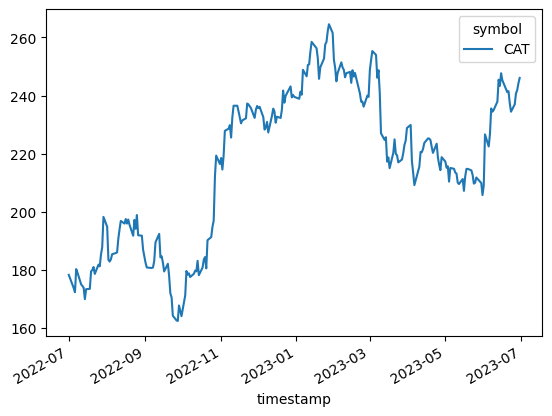

In [271]:
ticker = ['CAT']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_6 = ticker_data.loc[:,["close"]]
stock_df_6 = ticker_data[["close","symbol"]]
stock_df_6 = stock_df_6.pivot(columns='symbol', values='close')
stock_df_6.plot()

ema_signals_df_6 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_6 ["EMA13"] = stock_df_6['CAT'].ewm(span=short_window).mean()
ema_signals_df_6 ["EMA20"] = stock_df_6['CAT'].ewm(span=middle_window).mean()
ema_signals_df_6 ["EMA100"] = stock_df_6['CAT'].ewm(span=long_window).mean()
display(stock_df_6.head())
display(stock_df_6.tail())

ema_signals_df_6["Signal"] = 0.0
ema_signals_df_6["Signal"][short_window:] = np.where(
    ema_signals_df_6["EMA13"][short_window:] > ema_signals_df_6["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_6["Signal"][short_window:] = np.where(
    ema_signals_df_6["EMA13"][short_window:] > ema_signals_df_6["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_6["Signal"][short_window:] = np.where(
    ema_signals_df_6["EMA20"][short_window:] > ema_signals_df_6["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_6["Entry/Exit"] = ema_signals_df_6["Signal"].diff()

ema_signals_df_6.head(2556)


initial_capital = float(14285)
share_size = 80

ema_signals_df_6["Position"] = share_size * ema_signals_df_6["Signal"]
ema_signals_df_6.tail(2556)

ema_signals_df_6["Entry/Exit Position"] = ema_signals_df_6["Position"].diff()
ema_signals_df_6.tail(2556)

ema_signals_df_6["Portfolio Holdings"] = ema_signals_df_6["close"] * ema_signals_df_6["Position"]
ema_signals_df_6.tail(2556)

ema_signals_df_6["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_6["close"] * ema_signals_df_6["Entry/Exit Position"]).cumsum()
)
ema_signals_df_6.tail(2556)

ema_signals_df_6["Portfolio Total"] = ema_signals_df_6["Portfolio Cash"] + ema_signals_df_6["Portfolio Holdings"]
ema_signals_df_6.tail(2556)

ema_signals_df_6["Portfolio Daily Returns"] = ema_signals_df_6["Portfolio Total"].pct_change()
ema_signals_df_6.tail(2556)


symbol,DE
timestamp,
2022-07-01 04:00:00+00:00,301.63
2022-07-05 04:00:00+00:00,292.13
2022-07-06 04:00:00+00:00,289.14
2022-07-07 04:00:00+00:00,303.97
2022-07-08 04:00:00+00:00,304.64


symbol,DE
timestamp,
2023-06-26 04:00:00+00:00,410.19
2023-06-27 04:00:00+00:00,409.51
2023-06-28 04:00:00+00:00,405.20
2023-06-29 04:00:00+00:00,401.63
2023-06-30 04:00:00+00:00,405.19


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,301.63,301.630000,301.630000,301.630000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,292.13,296.514615,296.642500,296.832500,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,289.14,293.669291,293.887627,294.216881,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,303.97,296.866706,296.798252,296.728792,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,304.64,298.933330,298.695104,298.374949,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,410.19,399.487695,393.053583,390.014308,1.0,0.0,47.0,0.0,19278.93,-1747.64,17531.29,0.015629
2023-06-27 04:00:00+00:00,409.51,400.919453,394.620861,390.403087,1.0,0.0,47.0,0.0,19246.97,-1747.64,17499.33,-0.001823
2023-06-28 04:00:00+00:00,405.20,401.530960,395.628398,390.698123,1.0,0.0,47.0,0.0,19044.40,-1747.64,17296.76,-0.011576


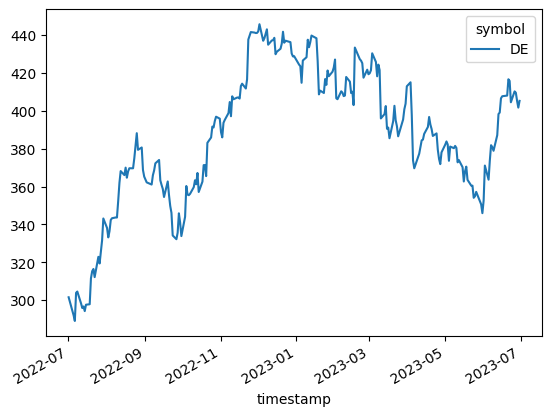

In [272]:
ticker = ['DE']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_7 = ticker_data.loc[:,["close"]]
stock_df_7 = ticker_data[["close","symbol"]]
stock_df_7 = stock_df_7.pivot(columns='symbol', values='close')
stock_df_7.plot()

ema_signals_df_7 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_7 ["EMA13"] = stock_df_7['DE'].ewm(span=short_window).mean()
ema_signals_df_7 ["EMA20"] = stock_df_7['DE'].ewm(span=middle_window).mean()
ema_signals_df_7["EMA100"] = stock_df_7['DE'].ewm(span=long_window).mean()
display(stock_df_7.head())
display(stock_df_7.tail())

ema_signals_df_7["Signal"] = 0.0
ema_signals_df_7["Signal"][short_window:] = np.where(
    ema_signals_df_7["EMA13"][short_window:] > ema_signals_df_7["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_7["Signal"][short_window:] = np.where(
    ema_signals_df_7["EMA13"][short_window:] > ema_signals_df_7["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_7["Signal"][short_window:] = np.where(
    ema_signals_df_7["EMA20"][short_window:] > ema_signals_df_7["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_7["Entry/Exit"] = ema_signals_df_7["Signal"].diff()

ema_signals_df_7.head(2556)


initial_capital = float(14285)
share_size = 47

ema_signals_df_7["Position"] = share_size * ema_signals_df_7["Signal"]
ema_signals_df_7.tail(2556)

ema_signals_df_7["Entry/Exit Position"] = ema_signals_df_7["Position"].diff()
ema_signals_df_7.tail(2556)

ema_signals_df_7["Portfolio Holdings"] = ema_signals_df_7["close"] * ema_signals_df_7["Position"]
ema_signals_df_7.tail(2556)

ema_signals_df_7["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_7["close"] * ema_signals_df_7["Entry/Exit Position"]).cumsum()
)
ema_signals_df_7.tail(2556)

ema_signals_df_7["Portfolio Total"] = ema_signals_df_7["Portfolio Cash"] + ema_signals_df_7["Portfolio Holdings"]
ema_signals_df_7.tail(2556)

ema_signals_df_7["Portfolio Daily Returns"] = ema_signals_df_7["Portfolio Total"].pct_change()
ema_signals_df_7.tail(2556)


In [273]:
stock_df_1 = pd.DataFrame(data1)
stock_df_2 = pd.DataFrame(data2)

In [274]:
sum_df = ema_signals_df_1["Portfolio Cash"] + ema_signals_df_1["Portfolio Holdings"] +ema_signals_df_2["Portfolio Cash"] + ema_signals_df_2["Portfolio Holdings"] + ema_signals_df_3["Portfolio Cash"] + ema_signals_df_3["Portfolio Holdings"] + ema_signals_df_6["Portfolio Cash"] + ema_signals_df_6["Portfolio Holdings"] + ema_signals_df_4["Portfolio Cash"] + ema_signals_df_4["Portfolio Holdings"] + ema_signals_df_5["Portfolio Cash"] + ema_signals_df_5["Portfolio Holdings"] + ema_signals_df_7["Portfolio Cash"] + ema_signals_df_7["Portfolio Holdings"] 
         
print(sum_df)

timestamp
2022-07-01 04:00:00+00:00         NaN
2022-07-05 04:00:00+00:00    99995.00
2022-07-06 04:00:00+00:00    99995.00
2022-07-07 04:00:00+00:00    99995.00
2022-07-08 04:00:00+00:00    99995.00
                               ...   
2023-06-26 04:00:00+00:00    93174.90
2023-06-27 04:00:00+00:00    94701.53
2023-06-28 04:00:00+00:00    94939.55
2023-06-29 04:00:00+00:00    94826.00
2023-06-30 04:00:00+00:00    96343.77
Length: 251, dtype: float64


In [275]:
sum_df = (
    ema_signals_df_1["Portfolio Cash"] + ema_signals_df_1["Portfolio Holdings"] +
    ema_signals_df_2["Portfolio Cash"] + ema_signals_df_2["Portfolio Holdings"] +
    ema_signals_df_3["Portfolio Cash"] + ema_signals_df_3["Portfolio Holdings"] +
    ema_signals_df_4["Portfolio Cash"] + ema_signals_df_4["Portfolio Holdings"] +
    ema_signals_df_5["Portfolio Cash"] + ema_signals_df_5["Portfolio Holdings"] +
    ema_signals_df_6["Portfolio Cash"] + ema_signals_df_6["Portfolio Holdings"] +
    ema_signals_df_7["Portfolio Cash"] + ema_signals_df_7["Portfolio Holdings"]
)

print(sum_df)

timestamp
2022-07-01 04:00:00+00:00         NaN
2022-07-05 04:00:00+00:00    99995.00
2022-07-06 04:00:00+00:00    99995.00
2022-07-07 04:00:00+00:00    99995.00
2022-07-08 04:00:00+00:00    99995.00
                               ...   
2023-06-26 04:00:00+00:00    93174.90
2023-06-27 04:00:00+00:00    94701.53
2023-06-28 04:00:00+00:00    94939.55
2023-06-29 04:00:00+00:00    94826.00
2023-06-30 04:00:00+00:00    96343.77
Length: 251, dtype: float64


symbol,DIS
timestamp,
2022-07-01 04:00:00+00:00,96.14
2022-07-05 04:00:00+00:00,97.18
2022-07-06 04:00:00+00:00,96.08
2022-07-07 04:00:00+00:00,97.43
2022-07-08 04:00:00+00:00,95.86


symbol,DIS
timestamp,
2023-06-26 04:00:00+00:00,88.70
2023-06-27 04:00:00+00:00,89.06
2023-06-28 04:00:00+00:00,88.83
2023-06-29 04:00:00+00:00,88.95
2023-06-30 04:00:00+00:00,89.28


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,96.14,96.140000,96.140000,96.140000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,97.18,96.700000,96.686000,96.665200,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,NaN
2022-07-06 04:00:00+00:00,96.08,96.460787,96.463480,96.466219,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
2022-07-07 04:00:00+00:00,97.43,96.761638,96.742500,96.714440,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
2022-07-08 04:00:00+00:00,95.86,96.521927,96.529031,96.536649,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,88.70,90.222795,90.854222,95.495685,0.0,0.0,0.0,0.0,0.0,13826.56,13826.56,0.0
2023-06-27 04:00:00+00:00,89.06,90.056682,90.683344,95.367346,0.0,0.0,0.0,0.0,0.0,13826.56,13826.56,0.0
2023-06-28 04:00:00+00:00,88.83,89.881442,90.506835,95.236998,0.0,0.0,0.0,0.0,0.0,13826.56,13826.56,0.0


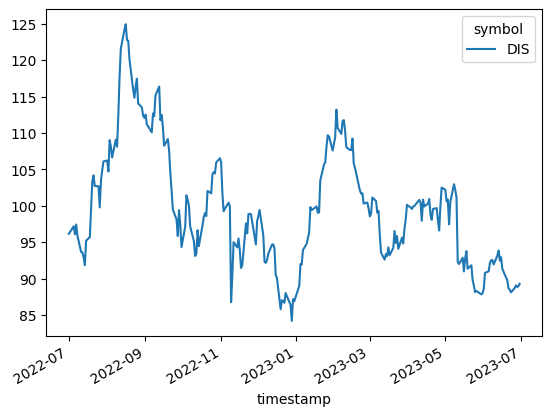

In [305]:
#CYCLICAL STOCKS PORTFOLIO
 #There are 5 stocks in this portfolio therefore $20000 in each stock
    #Ideally share amount/trade would being dynamic, continuousily dividing $20000 by the current price to avoid using more funds than are dedicated for that stock. 
    #For the purpose of this exercise we will use $20000 divided by the price on th start date to determine share amount/trade. 
ticker = ["DIS"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_1_1 = ticker_data.loc[:,["close"]]
stock_df_1_1 = ticker_data[["close","symbol"]]
stock_df_1_1 = stock_df_1_1.pivot(columns='symbol', values='close')
stock_df_1_1.plot()

ema_signals_df_1_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_1_1 ["EMA13"] = stock_df_1_1["DIS"].ewm(span=short_window).mean()
ema_signals_df_1_1 ["EMA20"] = stock_df_1_1["DIS"].ewm(span=middle_window).mean()
ema_signals_df_1_1 ["EMA100"] = stock_df_1_1["DIS"].ewm(span=long_window).mean()
display(stock_df_1_1.head())
display(stock_df_1_1.tail())

ema_signals_df_1_1["Signal"] = 0.0
ema_signals_df_1_1["Signal"][short_window:] = np.where(
    ema_signals_df_1_1["EMA13"][short_window:] > ema_signals_df_1_1["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_1_1["Signal"][short_window:] = np.where(
    ema_signals_df_1_1["EMA13"][short_window:] > ema_signals_df_1_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_1_1["Signal"][short_window:] = np.where(
    ema_signals_df_1_1["EMA20"][short_window:] > ema_signals_df_1_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_1_1["Entry/Exit"] = ema_signals_df_1_1["Signal"].diff()

ema_signals_df_1_1.head(2556)


initial_capital = float(20000)
share_size = 208

ema_signals_df_1_1["Position"] = share_size * ema_signals_df_1_1["Signal"]
ema_signals_df_1_1.tail(2556)

ema_signals_df_1_1["Entry/Exit Position"] = ema_signals_df_1_1["Position"].diff()
ema_signals_df_1_1.tail(2556)

ema_signals_df_1_1["Portfolio Holdings"] = ema_signals_df_1_1["close"] * ema_signals_df_1_1["Position"]
ema_signals_df_1_1.tail(2556)

ema_signals_df_1_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_1_1["close"] * ema_signals_df_1_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df_1.tail(2556)

ema_signals_df_1_1["Portfolio Total"] = ema_signals_df_1_1["Portfolio Cash"] + ema_signals_df_1_1["Portfolio Holdings"]
ema_signals_df_1_1.tail(2556)

ema_signals_df_1_1["Portfolio Daily Returns"] = ema_signals_df_1_1["Portfolio Total"].pct_change()
ema_signals_df_1_1.tail(2556)

symbol,EXPE
timestamp,
2022-07-01 04:00:00+00:00,96.40
2022-07-05 04:00:00+00:00,97.17
2022-07-06 04:00:00+00:00,93.87
2022-07-07 04:00:00+00:00,96.70
2022-07-08 04:00:00+00:00,94.87


symbol,EXPE
timestamp,
2023-06-26 04:00:00+00:00,104.16
2023-06-27 04:00:00+00:00,108.09
2023-06-28 04:00:00+00:00,108.33
2023-06-29 04:00:00+00:00,107.84
2023-06-30 04:00:00+00:00,109.40


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,96.40,96.400000,96.400000,96.400000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,97.17,96.814615,96.804250,96.788850,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,NaN
2022-07-06 04:00:00+00:00,93.87,95.678504,95.726811,95.796377,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
2022-07-07 04:00:00+00:00,96.70,95.995584,96.007756,96.029104,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
2022-07-08 04:00:00+00:00,94.87,95.696334,95.732542,95.787919,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,104.16,105.742504,104.593558,99.822978,1.0,0.0,148.0,0.0,15415.68,-1366.76,14048.92,-0.006593
2023-06-27 04:00:00+00:00,108.09,106.077860,104.926553,99.987837,1.0,0.0,148.0,0.0,15997.32,-1366.76,14630.56,0.041401
2023-06-28 04:00:00+00:00,108.33,106.399595,105.250690,100.154172,1.0,0.0,148.0,0.0,16032.84,-1366.76,14666.08,0.002428


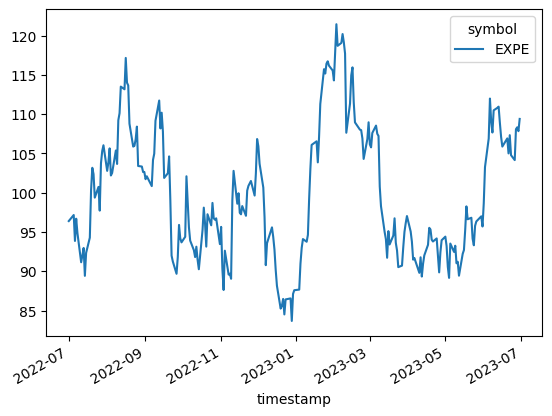

In [286]:
ticker = ["EXPE"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_2_1 = ticker_data.loc[:,["close"]]
stock_df_2_1 = ticker_data[["close","symbol"]]
stock_df_2_1 = stock_df_2_1.pivot(columns='symbol', values='close')
stock_df_2_1.plot()

ema_signals_df_2_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_2_1 ["EMA13"] = stock_df_2_1["EXPE"].ewm(span=short_window).mean()
ema_signals_df_2_1 ["EMA20"] = stock_df_2_1["EXPE"].ewm(span=middle_window).mean()
ema_signals_df_2_1 ["EMA100"] = stock_df_2_1["EXPE"].ewm(span=long_window).mean()
display(stock_df_2_1.head())
display(stock_df_2_1.tail())

ema_signals_df_2_1["Signal"] = 0.0
ema_signals_df_2_1["Signal"][short_window:] = np.where(
    ema_signals_df_2_1["EMA13"][short_window:] > ema_signals_df_2_1["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_2_1["Signal"][short_window:] = np.where(
    ema_signals_df_2_1["EMA13"][short_window:] > ema_signals_df_2_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_2_1["Signal"][short_window:] = np.where(
    ema_signals_df_2_1["EMA20"][short_window:] > ema_signals_df_2_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_2_1["Entry/Exit"] = ema_signals_df_2_1["Signal"].diff()

ema_signals_df_2_1.head(2556)


initial_capital = float(20000)
share_size = 148

ema_signals_df_2_1["Position"] = share_size * ema_signals_df_2_1["Signal"]
ema_signals_df_2_1.tail(2556)

ema_signals_df_2_1["Entry/Exit Position"] = ema_signals_df_2_1["Position"].diff()
ema_signals_df_2_1.tail(2556)

ema_signals_df_2_1["Portfolio Holdings"] = ema_signals_df_2_1["close"] * ema_signals_df_2_1["Position"]
ema_signals_df_2_1.tail(2556)

ema_signals_df_2_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_2_1["close"] * ema_signals_df_2_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df_2_1.tail(2556)

ema_signals_df_2_1["Portfolio Total"] = ema_signals_df_2_1["Portfolio Cash"] + ema_signals_df_2_1["Portfolio Holdings"]
ema_signals_df_2_1.tail(2556)

ema_signals_df_2_1["Portfolio Daily Returns"] = ema_signals_df_2_1["Portfolio Total"].pct_change()
ema_signals_df_2_1.tail(2556)

symbol,NUE
timestamp,
2022-07-01 04:00:00+00:00,105.64
2022-07-05 04:00:00+00:00,104.60
2022-07-06 04:00:00+00:00,105.91
2022-07-07 04:00:00+00:00,110.49
2022-07-08 04:00:00+00:00,109.01


symbol,NUE
timestamp,
2023-06-26 04:00:00+00:00,155.37
2023-06-27 04:00:00+00:00,160.77
2023-06-28 04:00:00+00:00,161.12
2023-06-29 04:00:00+00:00,163.33
2023-06-30 04:00:00+00:00,163.98


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,105.64,105.640000,105.640000,105.640000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,104.60,105.080000,105.094000,105.114800,0.0,0.0,0.0,0.0,0.0,20000.0,20000.0,NaN
2022-07-06 04:00:00+00:00,105.91,105.400236,105.393630,105.385185,0.0,0.0,0.0,0.0,0.0,20000.0,20000.0,0.000000
2022-07-07 04:00:00+00:00,110.49,106.980136,106.864873,106.699928,0.0,0.0,0.0,0.0,0.0,20000.0,20000.0,0.000000
2022-07-08 04:00:00+00:00,109.01,107.519800,107.383761,107.180606,0.0,0.0,0.0,0.0,0.0,20000.0,20000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,155.37,150.192293,148.191127,147.277915,1.0,0.0,190.0,0.0,29520.3,-10844.6,18675.7,0.016337
2023-06-27 04:00:00+00:00,160.77,151.703394,149.389115,147.546971,1.0,0.0,190.0,0.0,30546.3,-10844.6,19701.7,0.054938
2023-06-28 04:00:00+00:00,161.12,153.048623,150.506342,147.817604,1.0,0.0,190.0,0.0,30612.8,-10844.6,19768.2,0.003375


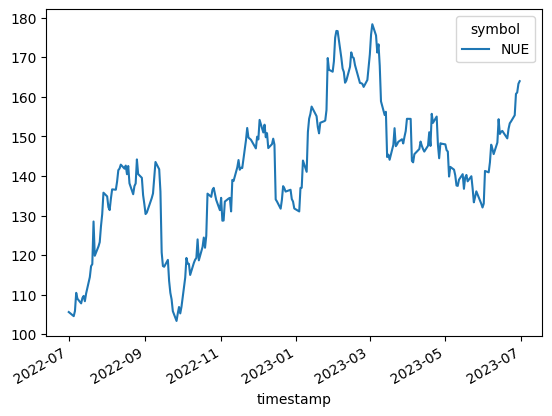

In [287]:
ticker = ['NUE']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_3_1 = ticker_data.loc[:,["close"]]
stock_df_3_1 = ticker_data[["close","symbol"]]
stock_df_3_1 = stock_df_3_1.pivot(columns='symbol', values='close')
stock_df_3_1.plot()

ema_signals_df_3_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_3_1 ["EMA13"] = stock_df_3_1['NUE'].ewm(span=short_window).mean()
ema_signals_df_3_1 ["EMA20"] = stock_df_3_1['NUE'].ewm(span=middle_window).mean()
ema_signals_df_3_1 ["EMA100"] = stock_df_3_1['NUE'].ewm(span=long_window).mean()
display(stock_df_3_1.head())
display(stock_df_3_1.tail())

ema_signals_df_3_1["Signal"] = 0.0
ema_signals_df_3_1["Signal"][short_window:] = np.where(
    ema_signals_df_3_1["EMA13"][short_window:] > ema_signals_df_3_1["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_3_1["Signal"][short_window:] = np.where(
    ema_signals_df_3_1["EMA13"][short_window:] > ema_signals_df_3_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_3_1["Signal"][short_window:] = np.where(
    ema_signals_df_3_1["EMA20"][short_window:] > ema_signals_df_3_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_3_1["Entry/Exit"] = ema_signals_df_3_1["Signal"].diff()

ema_signals_df_3_1.head(2556)


initial_capital = float(20000)
share_size = 190

ema_signals_df_3_1["Position"] = share_size * ema_signals_df_3_1["Signal"]
ema_signals_df_3_1.tail(2556)

ema_signals_df_3_1["Entry/Exit Position"] = ema_signals_df_3_1["Position"].diff()
ema_signals_df_3_1.tail(2556)

ema_signals_df_3_1["Portfolio Holdings"] = ema_signals_df_3_1["close"] * ema_signals_df_3_1["Position"]
ema_signals_df_3_1.tail(2556)

ema_signals_df_3_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_3_1["close"] * ema_signals_df_3_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df_3_1.tail(2556)

ema_signals_df_3_1["Portfolio Total"] = ema_signals_df_3_1["Portfolio Cash"] + ema_signals_df_3_1["Portfolio Holdings"]
ema_signals_df_3_1.tail(2556)
ema_signals_df_3_1["Portfolio Daily Returns"] = ema_signals_df_3_1["Portfolio Total"].pct_change()
ema_signals_df_3_1.tail(2556)

symbol,DPZ
timestamp,
2022-07-01 04:00:00+00:00,403.61
2022-07-05 04:00:00+00:00,396.80
2022-07-06 04:00:00+00:00,397.57
2022-07-07 04:00:00+00:00,405.54
2022-07-08 04:00:00+00:00,401.35


symbol,DPZ
timestamp,
2023-06-26 04:00:00+00:00,319.24
2023-06-27 04:00:00+00:00,324.93
2023-06-28 04:00:00+00:00,325.52
2023-06-29 04:00:00+00:00,330.73
2023-06-30 04:00:00+00:00,336.99


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,403.61,403.610000,403.610000,403.610000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,396.80,399.943077,400.034750,400.170950,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,NaN
2022-07-06 04:00:00+00:00,397.57,399.027480,399.129709,399.286570,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
2022-07-07 04:00:00+00:00,405.54,401.049014,400.980261,400.897138,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
2022-07-08 04:00:00+00:00,401.35,401.129034,401.069697,400.991369,0.0,0.0,0.0,0.0,0.0,20000.00,20000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,319.24,315.013083,312.598086,319.934577,0.0,0.0,0.0,0.0,0.0,15949.17,15949.17,0.0
2023-06-27 04:00:00+00:00,324.93,316.429786,313.772554,320.034195,0.0,0.0,0.0,0.0,0.0,15949.17,15949.17,0.0
2023-06-28 04:00:00+00:00,325.52,317.728388,314.891358,320.143577,0.0,0.0,0.0,0.0,0.0,15949.17,15949.17,0.0


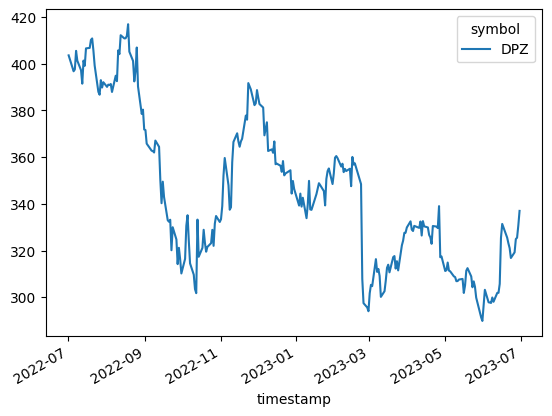

In [288]:
ticker = ['DPZ']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_4_1= ticker_data.loc[:,["close"]]
stock_df_4_1 = ticker_data[["close","symbol"]]
stock_df_4_1 = stock_df_4_1.pivot(columns='symbol', values='close')
stock_df_4_1.plot()

ema_signals_df_4_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_4_1 ["EMA13"] = stock_df_4_1['DPZ'].ewm(span=short_window).mean()
ema_signals_df_4_1 ["EMA20"] = stock_df_4_1['DPZ'].ewm(span=middle_window).mean()
ema_signals_df_4_1 ["EMA100"] = stock_df_4_1['DPZ'].ewm(span=long_window).mean()
display(stock_df_4_1.head())
display(stock_df_4_1.tail())

ema_signals_df_4_1["Signal"] = 0.0
ema_signals_df_4_1["Signal"][short_window:] = np.where(
    ema_signals_df_4_1["EMA13"][short_window:] > ema_signals_df_4["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_4_1["Signal"][short_window:] = np.where(
    ema_signals_df_4_1["EMA13"][short_window:] > ema_signals_df_4_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_4_1["Signal"][short_window:] = np.where(
    ema_signals_df_4_1["EMA20"][short_window:] > ema_signals_df_4_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_4_1["Entry/Exit"] = ema_signals_df_4_1["Signal"].diff()

ema_signals_df_4_1.head(2556)


initial_capital = float(20000)
share_size = 49

ema_signals_df_4_1["Position"] = share_size * ema_signals_df_4_1["Signal"]
ema_signals_df_4_1.tail(2556)

ema_signals_df_4_1["Entry/Exit Position"] = ema_signals_df_4_1["Position"].diff()
ema_signals_df_4_1.tail(2556)

ema_signals_df_4_1["Portfolio Holdings"] = ema_signals_df_4_1["close"] * ema_signals_df_4_1["Position"]
ema_signals_df_4_1.tail(2556)

ema_signals_df_4_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_4_1["close"] * ema_signals_df_4_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df.tail(2556)

ema_signals_df_4_1["Portfolio Total"] = ema_signals_df_4_1["Portfolio Cash"] + ema_signals_df_4_1["Portfolio Holdings"]
ema_signals_df_4_1.tail(2556)

ema_signals_df_4_1["Portfolio Daily Returns"] = ema_signals_df_4_1["Portfolio Total"].pct_change()
ema_signals_df_4_1.tail(2556)

symbol,CMG
timestamp,
2022-07-01 04:00:00+00:00,1306.80
2022-07-05 04:00:00+00:00,1362.71
2022-07-06 04:00:00+00:00,1342.33
2022-07-07 04:00:00+00:00,1351.24
2022-07-08 04:00:00+00:00,1339.28


symbol,CMG
timestamp,
2023-06-26 04:00:00+00:00,2032.31
2023-06-27 04:00:00+00:00,2066.73
2023-06-28 04:00:00+00:00,2101.49
2023-06-29 04:00:00+00:00,2110.60
2023-06-30 04:00:00+00:00,2139.00


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,1306.80,1306.800000,1306.800000,1306.800000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,1362.71,1336.905385,1336.152750,1335.034550,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,NaN
2022-07-06 04:00:00+00:00,1342.33,1338.998346,1338.420999,1337.515163,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
2022-07-07 04:00:00+00:00,1351.24,1342.798244,1342.121647,1341.049988,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
2022-07-08 04:00:00+00:00,1339.28,1341.862877,1341.434276,1340.681691,0.0,0.0,0.0,0.0,0.00,20000.00,20000.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,2032.31,2049.866459,2047.684447,1866.699730,1.0,0.0,15.0,0.0,30484.65,-3644.05,26840.60,-0.006314
2023-06-27 04:00:00+00:00,2066.73,2052.275537,2049.498309,1870.688695,1.0,0.0,15.0,0.0,31000.95,-3644.05,27356.90,0.019236
2023-06-28 04:00:00+00:00,2101.49,2059.306174,2054.449899,1875.290646,1.0,0.0,15.0,0.0,31522.35,-3644.05,27878.30,0.019059


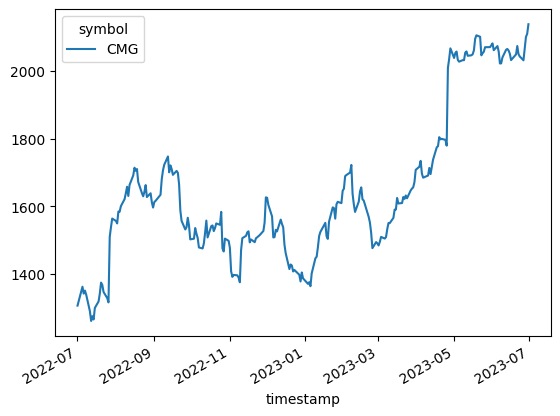

In [289]:
ticker = ['CMG']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_5_1 = ticker_data.loc[:,["close"]]
stock_df_5_1 = ticker_data[["close","symbol"]]
stock_df_5_1 = stock_df_5_1.pivot(columns='symbol', values='close')
stock_df_5_1.plot()

ema_signals_df_5_1 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_5_1 ["EMA13"] = stock_df_5_1['CMG'].ewm(span=short_window).mean()
ema_signals_df_5_1 ["EMA20"] = stock_df_5_1['CMG'].ewm(span=middle_window).mean()
ema_signals_df_5_1 ["EMA100"] = stock_df_5_1['CMG'].ewm(span=long_window).mean()
display(stock_df_5_1.head())
display(stock_df_5_1.tail())

ema_signals_df_5_1["Signal"] = 0.0
ema_signals_df_5_1["Signal"][short_window:] = np.where(
    ema_signals_df_5_1["EMA13"][short_window:] > ema_signals_df_5_1["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_5_1["Signal"][short_window:] = np.where(
    ema_signals_df_5_1["EMA13"][short_window:] > ema_signals_df_5_1["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_5_1["Signal"][short_window:] = np.where(
    ema_signals_df_5_1["EMA20"][short_window:] > ema_signals_df_5_1["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_5_1["Entry/Exit"] = ema_signals_df_5_1["Signal"].diff()

ema_signals_df_5_1.head(2556)


initial_capital = float(20000)
share_size = 15

ema_signals_df_5_1["Position"] = share_size * ema_signals_df_5_1["Signal"]
ema_signals_df_5_1.tail(2556)

ema_signals_df_5_1["Entry/Exit Position"] = ema_signals_df_5_1["Position"].diff()
ema_signals_df_5_1.tail(2556)

ema_signals_df_5_1["Portfolio Holdings"] = ema_signals_df_5_1["close"] * ema_signals_df_5_1["Position"]
ema_signals_df_5_1.tail(2556)

ema_signals_df_5_1["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_5_1["close"] * ema_signals_df_5_1["Entry/Exit Position"]).cumsum()
)
ema_signals_df_5_1.tail(2556)

ema_signals_df_5_1["Portfolio Total"] = ema_signals_df_5_1["Portfolio Cash"] + ema_signals_df_5_1["Portfolio Holdings"]
ema_signals_df_5_1.tail(2556)

ema_signals_df_5_1["Portfolio Daily Returns"] = ema_signals_df_5_1["Portfolio Total"].pct_change()
ema_signals_df_5_1.tail(2556)


In [290]:
sum_df = (
    ema_signals_df_1_1["Portfolio Cash"] + ema_signals_df_1_1["Portfolio Holdings"] +
    ema_signals_df_2_1["Portfolio Cash"] + ema_signals_df_2_1["Portfolio Holdings"] + 
    ema_signals_df_3_1["Portfolio Cash"] + ema_signals_df_3_1["Portfolio Holdings"] +
    ema_signals_df_4_1["Portfolio Cash"] + ema_signals_df_4_1["Portfolio Holdings"] +
    ema_signals_df_5_1["Portfolio Cash"] + ema_signals_df_5_1["Portfolio Holdings"] 
)
print(sum_df)

timestamp
2022-07-01 04:00:00+00:00          NaN
2022-07-05 04:00:00+00:00    100000.00
2022-07-06 04:00:00+00:00    100000.00
2022-07-07 04:00:00+00:00    100000.00
2022-07-08 04:00:00+00:00    100000.00
                               ...    
2023-06-26 04:00:00+00:00     89340.95
2023-06-27 04:00:00+00:00     91464.89
2023-06-28 04:00:00+00:00     92088.31
2023-06-29 04:00:00+00:00     92572.34
2023-06-30 04:00:00+00:00     93352.72
Length: 251, dtype: float64


symbol,TSLA
timestamp,
2022-07-01 04:00:00+00:00,681.79
2022-07-05 04:00:00+00:00,699.20
2022-07-06 04:00:00+00:00,695.20
2022-07-07 04:00:00+00:00,733.63
2022-07-08 04:00:00+00:00,752.29


symbol,TSLA
timestamp,
2023-06-26 04:00:00+00:00,241.05
2023-06-27 04:00:00+00:00,250.21
2023-06-28 04:00:00+00:00,256.24
2023-06-29 04:00:00+00:00,257.50
2023-06-30 04:00:00+00:00,261.77


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,681.79,681.790000,681.790000,681.790000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,699.20,691.164615,690.930250,690.582050,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,NaN
2022-07-06 04:00:00+00:00,695.20,692.721575,692.498077,692.152255,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-07 04:00:00+00:00,733.63,705.419846,704.372227,702.834827,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
2022-07-08 04:00:00+00:00,752.29,717.880840,715.963128,713.125419,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,241.05,247.594243,237.799792,204.313636,1.0,0.0,20.0,0.0,4821.0,-607.8,4213.2,-0.068536
2023-06-27 04:00:00+00:00,250.21,247.967922,238.981717,205.228892,1.0,0.0,20.0,0.0,5004.2,-607.8,4396.4,0.043482
2023-06-28 04:00:00+00:00,256.24,249.149648,240.625363,206.246004,1.0,0.0,20.0,0.0,5124.8,-607.8,4517.0,0.027432


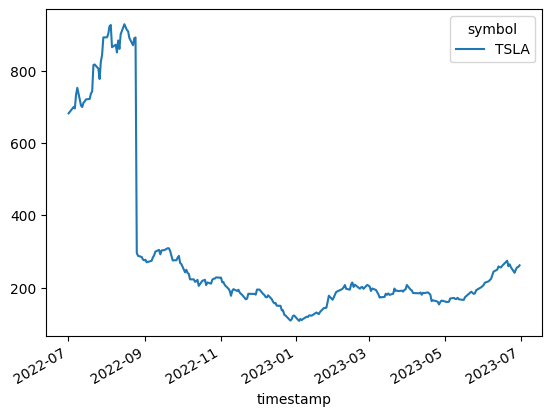

In [315]:
#AGGRESSIVE STOCKS PORTFOLIO
 #There are 7 stocks in this portfolio therefore $14285 in each stock
    #Ideally share amount/trade would being dynamic, continuousily dividing $14285 by the current price to avoid using more funds than are dedicated for that stock. 
    #For the purpose of this exercise we will use $14285 divided by the price on th start date to determine share amount/trade. 
ticker = ["TSLA"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_1_2 = ticker_data.loc[:,["close"]]
stock_df_1_2 = ticker_data[["close","symbol"]]
stock_df_1_2 = stock_df_1_2.pivot(columns='symbol', values='close')
stock_df_1_2.plot()

ema_signals_df_1_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_1_2 ["EMA13"] = stock_df_1_2["TSLA"].ewm(span=short_window).mean()
ema_signals_df_1_2 ["EMA20"] = stock_df_1_2["TSLA"].ewm(span=middle_window).mean()
ema_signals_df_1_2 ["EMA100"] = stock_df_1_2["TSLA"].ewm(span=long_window).mean()
display(stock_df_1_2.head())
display(stock_df_1_2.tail())

ema_signals_df_1_2["Signal"] = 0.0
ema_signals_df_1_2["Signal"][short_window:] = np.where(
    ema_signals_df_1_2["EMA13"][short_window:] > ema_signals_df_1_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_1_2["Signal"][short_window:] = np.where(
    ema_signals_df_1_2["EMA13"][short_window:] > ema_signals_df_1_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_1_2["Signal"][short_window:] = np.where(
    ema_signals_df_1_2["EMA20"][short_window:] > ema_signals_df_1_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_1_2["Entry/Exit"] = ema_signals_df_1_2["Signal"].diff()

ema_signals_df_1_2.head(2556)


initial_capital = float(14285)
share_size = 20

ema_signals_df_1_2["Position"] = share_size * ema_signals_df_1_2["Signal"]
ema_signals_df_1_2.tail(2556)

ema_signals_df_1_2["Entry/Exit Position"] = ema_signals_df_1_2["Position"].diff()
ema_signals_df_1_2.tail(2556)

ema_signals_df_1_2["Portfolio Holdings"] = ema_signals_df_1_2["close"] * ema_signals_df_1_2["Position"]
ema_signals_df_1_2.tail(2556)

ema_signals_df_1_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_1_2["close"] * ema_signals_df_1_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_1_2.tail(2556)

ema_signals_df_1_2["Portfolio Total"] = ema_signals_df_1_2["Portfolio Cash"] + ema_signals_df_1_2["Portfolio Holdings"]
ema_signals_df_1_2.tail(2556)

ema_signals_df_1_2["Portfolio Daily Returns"] = ema_signals_df_1_2["Portfolio Total"].pct_change()
ema_signals_df_1_2.tail(2556)

symbol,MSTR
timestamp,
2022-07-01 04:00:00+00:00,166.77
2022-07-05 04:00:00+00:00,187.68
2022-07-06 04:00:00+00:00,188.30
2022-07-07 04:00:00+00:00,219.51
2022-07-08 04:00:00+00:00,221.28


symbol,MSTR
timestamp,
2023-06-26 04:00:00+00:00,305.740
2023-06-27 04:00:00+00:00,324.880
2023-06-28 04:00:00+00:00,325.610
2023-06-29 04:00:00+00:00,340.255
2023-06-30 04:00:00+00:00,342.575


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,166.770,166.770000,166.770000,166.770000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,187.680,178.029231,177.747750,177.329550,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,188.300,181.991969,181.622473,181.059744,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,219.510,193.637837,192.560016,190.962588,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,221.280,200.986839,199.507136,197.271011,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,305.740,305.104879,301.359480,280.461238,1.0,0.0,86.0,0.0,26293.64,-21128.08,5165.56,-0.277589
2023-06-27 04:00:00+00:00,324.880,307.929896,303.599529,281.347028,1.0,0.0,86.0,0.0,27939.68,-21128.08,6811.60,0.318657
2023-06-28 04:00:00+00:00,325.610,310.455625,305.695764,282.229588,1.0,0.0,86.0,0.0,28002.46,-21128.08,6874.38,0.009217


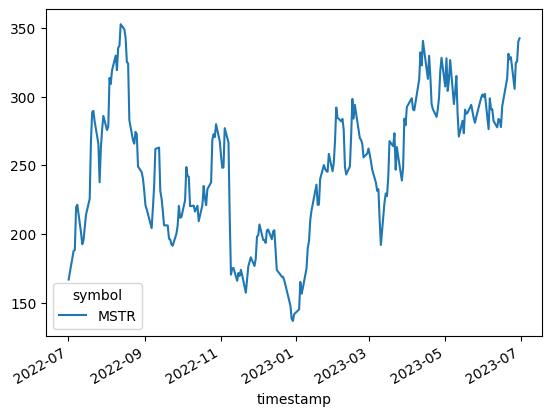

In [300]:
ticker = ["MSTR"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_2 = ticker_data.loc[:,["close"]]
stock_df_2 = ticker_data[["close","symbol"]]
stock_df_2 = stock_df_2.pivot(columns='symbol', values='close')
stock_df_2.plot()

ema_signals_df_2_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_2_2 ["EMA13"] = stock_df_2["MSTR"].ewm(span=short_window).mean()
ema_signals_df_2_2 ["EMA20"] = stock_df_2["MSTR"].ewm(span=middle_window).mean()
ema_signals_df_2_2 ["EMA100"] = stock_df_2["MSTR"].ewm(span=long_window).mean()
display(stock_df_2.head())
display(stock_df_2.tail())

ema_signals_df_2_2["Signal"] = 0.0
ema_signals_df_2_2["Signal"][short_window:] = np.where(
    ema_signals_df_2_2["EMA13"][short_window:] > ema_signals_df_2_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_2_2["Signal"][short_window:] = np.where(
    ema_signals_df_2_2["EMA13"][short_window:] > ema_signals_df_2_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_2_2["Signal"][short_window:] = np.where(
    ema_signals_df_2_2["EMA20"][short_window:] > ema_signals_df_2_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_2_2["Entry/Exit"] = ema_signals_df_2_2["Signal"].diff()

ema_signals_df_2_2.head(2556)


initial_capital = float(14285)
share_size = 86

ema_signals_df_2_2["Position"] = share_size * ema_signals_df_2_2["Signal"]
ema_signals_df_2_2.tail(2556)

ema_signals_df_2_2["Entry/Exit Position"] = ema_signals_df_2_2["Position"].diff()
ema_signals_df_2_2.tail(2556)

ema_signals_df_2_2["Portfolio Holdings"] = ema_signals_df_2_2["close"] * ema_signals_df_2_2["Position"]
ema_signals_df_2_2.tail(2556)

ema_signals_df_2_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_2_2["close"] * ema_signals_df_2_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_2_2.tail(2556)

ema_signals_df_2_2["Portfolio Total"] = ema_signals_df_2_2["Portfolio Cash"] + ema_signals_df_2_2["Portfolio Holdings"]
ema_signals_df_2_2.tail(2556)

ema_signals_df_2_2["Portfolio Daily Returns"] = ema_signals_df_2_2["Portfolio Total"].pct_change()
ema_signals_df_2_2.tail(2556)

symbol,FANG
timestamp,
2022-07-01 04:00:00+00:00,121.21
2022-07-05 04:00:00+00:00,114.14
2022-07-06 04:00:00+00:00,110.28
2022-07-07 04:00:00+00:00,116.30
2022-07-08 04:00:00+00:00,116.33


symbol,FANG
timestamp,
2023-06-26 04:00:00+00:00,127.22
2023-06-27 04:00:00+00:00,127.32
2023-06-28 04:00:00+00:00,128.61
2023-06-29 04:00:00+00:00,130.01
2023-06-30 04:00:00+00:00,131.36


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,121.21,121.210000,121.210000,121.210000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,114.14,117.403077,117.498250,117.639650,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,NaN
2022-07-06 04:00:00+00:00,110.28,114.654803,114.847752,115.137207,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.0
2022-07-07 04:00:00+00:00,116.30,115.165484,115.266993,115.436684,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.0
2022-07-08 04:00:00+00:00,116.33,115.475085,115.524126,115.622564,0.0,0.0,0.0,0.0,0.0,14285.0,14285.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,127.22,128.034448,128.835489,134.286193,0.0,0.0,0.0,0.0,0.0,10579.8,10579.8,0.0
2023-06-27 04:00:00+00:00,127.32,127.932384,128.691156,134.147275,0.0,0.0,0.0,0.0,0.0,10579.8,10579.8,0.0
2023-06-28 04:00:00+00:00,128.61,128.029187,128.683427,134.036867,0.0,0.0,0.0,0.0,0.0,10579.8,10579.8,0.0


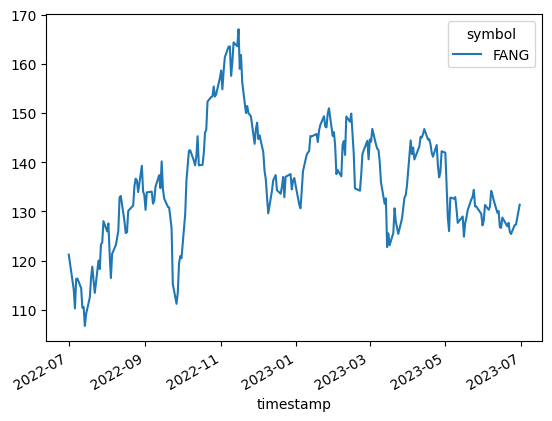

In [318]:
ticker = ['FANG']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_3_2 = ticker_data.loc[:,["close"]]
stock_df_3_2 = ticker_data[["close","symbol"]]
stock_df_3_2 = stock_df_3_2.pivot(columns='symbol', values='close')
stock_df_3_2.plot()

ema_signals_df_3_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_3_2 ["EMA13"] = stock_df_3_2['FANG'].ewm(span=short_window).mean()
ema_signals_df_3_2 ["EMA20"] = stock_df_3_2['FANG'].ewm(span=middle_window).mean()
ema_signals_df_3_2 ["EMA100"] = stock_df_3_2['FANG'].ewm(span=long_window).mean()
display(stock_df_3_2.head())
display(stock_df_3_2.tail())

ema_signals_df_3_2["Signal"] = 0.0
ema_signals_df_3_2["Signal"][short_window:] = np.where(
    ema_signals_df_3_2["EMA13"][short_window:] > ema_signals_df_3_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_3_2["Signal"][short_window:] = np.where(
    ema_signals_df_3_2["EMA13"][short_window:] > ema_signals_df_3_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_3_2["Signal"][short_window:] = np.where(
    ema_signals_df_3_2["EMA20"][short_window:] > ema_signals_df_3_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_3_2["Entry/Exit"] = ema_signals_df_3_2["Signal"].diff()

ema_signals_df_3_2.head(2556)


initial_capital = float(14285)
share_size = 118

ema_signals_df_3_2["Position"] = share_size * ema_signals_df_3_2["Signal"]
ema_signals_df_3_2.tail(2556)

ema_signals_df_3_2["Entry/Exit Position"] = ema_signals_df_3_2["Position"].diff()
ema_signals_df_3_2.tail(2556)

ema_signals_df_3_2["Portfolio Holdings"] = ema_signals_df_3_2["close"] * ema_signals_df_3_2["Position"]
ema_signals_df_3_2.tail(2556)

ema_signals_df_3_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_3_2["close"] * ema_signals_df_3_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_3_2.tail(2556)

ema_signals_df_3_2["Portfolio Total"] = ema_signals_df_3_2["Portfolio Cash"] + ema_signals_df_3_2["Portfolio Holdings"]
ema_signals_df_3_2.tail(2556)
ema_signals_df_3_2["Portfolio Daily Returns"] = ema_signals_df_3_2["Portfolio Total"].pct_change()
ema_signals_df_3_2.tail(2556)

symbol,CROX
timestamp,
2022-07-01 04:00:00+00:00,47.95
2022-07-05 04:00:00+00:00,53.81
2022-07-06 04:00:00+00:00,52.33
2022-07-07 04:00:00+00:00,58.11
2022-07-08 04:00:00+00:00,58.08


symbol,CROX
timestamp,
2023-06-26 04:00:00+00:00,104.79
2023-06-27 04:00:00+00:00,107.08
2023-06-28 04:00:00+00:00,107.13
2023-06-29 04:00:00+00:00,108.21
2023-06-30 04:00:00+00:00,112.42


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,47.95,47.950000,47.950000,47.950000,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,53.81,51.105385,51.026500,50.909300,0.0,0.0,0.0,0.0,0.0,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,52.33,51.577874,51.505137,51.392369,0.0,0.0,0.0,0.0,0.0,14285.00,14285.00,0.0
2022-07-07 04:00:00+00:00,58.11,53.605493,53.411859,53.122492,0.0,0.0,0.0,0.0,0.0,14285.00,14285.00,0.0
2022-07-08 04:00:00+00:00,58.08,54.795095,54.541043,54.154046,0.0,0.0,0.0,0.0,0.0,14285.00,14285.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,104.79,109.701032,110.993086,115.413685,0.0,0.0,0.0,0.0,0.0,16608.75,16608.75,0.0
2023-06-27 04:00:00+00:00,107.08,109.326599,110.620411,115.247496,0.0,0.0,0.0,0.0,0.0,16608.75,16608.75,0.0
2023-06-28 04:00:00+00:00,107.13,109.012799,110.287991,115.085641,0.0,0.0,0.0,0.0,0.0,16608.75,16608.75,0.0


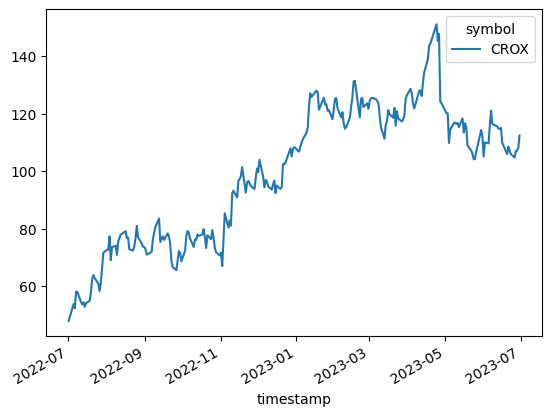

In [321]:
ticker = ['CROX']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_4_2 = ticker_data.loc[:,["close"]]
stock_df_4_2 = ticker_data[["close","symbol"]]
stock_df_4_2 = stock_df_4_2.pivot(columns='symbol', values='close')
stock_df_4_2.plot()

ema_signals_df_4_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_4_2 ["EMA13"] = stock_df_4_2['CROX'].ewm(span=short_window).mean()
ema_signals_df_4_2 ["EMA20"] = stock_df_4_2['CROX'].ewm(span=middle_window).mean()
ema_signals_df_4_2 ["EMA100"] = stock_df_4_2['CROX'].ewm(span=long_window).mean()
display(stock_df_4_2.head())
display(stock_df_4_2.tail())

ema_signals_df_4_2["Signal"] = 0.0
ema_signals_df_4_2["Signal"][short_window:] = np.where(
    ema_signals_df_4_2["EMA13"][short_window:] > ema_signals_df_4_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_4_2["Signal"][short_window:] = np.where(
    ema_signals_df_4_2["EMA13"][short_window:] > ema_signals_df_4_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_4_2["Signal"][short_window:] = np.where(
    ema_signals_df_4_2["EMA20"][short_window:] > ema_signals_df_4_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_4_2["Entry/Exit"] = ema_signals_df_4_2["Signal"].diff()

ema_signals_df_4_2.head(2556)


initial_capital = float(14285)
share_size = 55

ema_signals_df_4_2["Position"] = share_size * ema_signals_df_4_2["Signal"]
ema_signals_df_4_2.tail(2556)

ema_signals_df_4_2["Entry/Exit Position"] = ema_signals_df_4_2["Position"].diff()
ema_signals_df_4_2.tail(2556)

ema_signals_df_4_2["Portfolio Holdings"] = ema_signals_df_4_2["close"] * ema_signals_df_4_2["Position"]
ema_signals_df_4_2.tail(2556)

ema_signals_df_4_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_4_2["close"] * ema_signals_df_4_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_4_2.tail(2556)

ema_signals_df_4_2["Portfolio Total"] = ema_signals_df_4_2["Portfolio Cash"] + ema_signals_df_4_2["Portfolio Holdings"]
ema_signals_df_4_2.tail(2556)

ema_signals_df_4_2["Portfolio Daily Returns"] = ema_signals_df_4_2["Portfolio Total"].pct_change()
ema_signals_df_4_2.tail(2556)

symbol,AMD
timestamp,
2022-07-01 04:00:00+00:00,73.67
2022-07-05 04:00:00+00:00,75.20
2022-07-06 04:00:00+00:00,75.35
2022-07-07 04:00:00+00:00,79.30
2022-07-08 04:00:00+00:00,79.35


symbol,AMD
timestamp,
2023-06-26 04:00:00+00:00,107.51
2023-06-27 04:00:00+00:00,110.39
2023-06-28 04:00:00+00:00,110.17
2023-06-29 04:00:00+00:00,111.24
2023-06-30 04:00:00+00:00,113.88


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,73.67,73.670000,73.670000,73.670000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,75.20,74.493846,74.473250,74.442650,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,75.35,74.824173,74.795187,74.751169,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,79.30,76.213502,76.095657,75.922718,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,79.35,77.047378,76.882855,76.635864,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,107.51,115.861461,115.513940,99.103848,1.0,0.0,195.0,0.0,20964.45,-2783.35,18181.10,-0.026113
2023-06-27 04:00:00+00:00,110.39,115.079824,115.025946,99.328914,1.0,0.0,195.0,0.0,21526.05,-2783.35,18742.70,0.030889
2023-06-28 04:00:00+00:00,110.17,114.378421,114.563475,99.545075,1.0,0.0,195.0,0.0,21483.15,-2783.35,18699.80,-0.002289


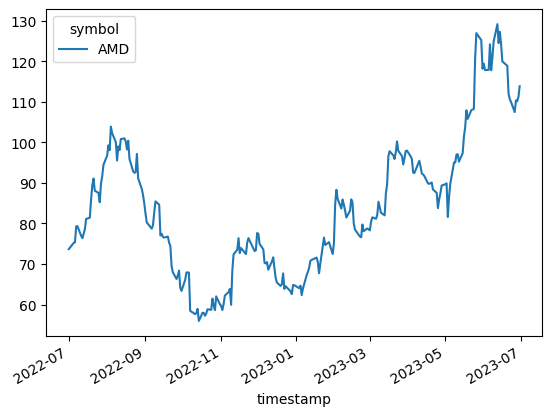

In [325]:
ticker = ['AMD']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_5_2 = ticker_data.loc[:,["close"]]
stock_df_5_2 = ticker_data[["close","symbol"]]
stock_df_5_2 = stock_df_5_2.pivot(columns='symbol', values='close')
stock_df_5_2.plot()

ema_signals_df_5_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_5_2 ["EMA13"] = stock_df_5_2['AMD'].ewm(span=short_window).mean()
ema_signals_df_5_2 ["EMA20"] = stock_df_5_2['AMD'].ewm(span=middle_window).mean()
ema_signals_df_5_2 ["EMA100"] = stock_df_5_2['AMD'].ewm(span=long_window).mean()
display(stock_df_5_2.head())
display(stock_df_5_2.tail())

ema_signals_df_5_2["Signal"] = 0.0
ema_signals_df_5_2["Signal"][short_window:] = np.where(
    ema_signals_df_5_2["EMA13"][short_window:] > ema_signals_df_5_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_5_2["Signal"][short_window:] = np.where(
    ema_signals_df_5_2["EMA13"][short_window:] > ema_signals_df_5_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_5_2["Signal"][short_window:] = np.where(
    ema_signals_df_5_2["EMA20"][short_window:] > ema_signals_df_5_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_5_2["Entry/Exit"] = ema_signals_df_5_2["Signal"].diff()

ema_signals_df_5_2.head(2556)


initial_capital = float(14285)
share_size = 195

ema_signals_df_5_2["Position"] = share_size * ema_signals_df_5_2["Signal"]
ema_signals_df_5_2.tail(2556)

ema_signals_df_5_2["Entry/Exit Position"] = ema_signals_df_5_2["Position"].diff()
ema_signals_df_5_2.tail(2556)

ema_signals_df_5_2["Portfolio Holdings"] = ema_signals_df_5_2["close"] * ema_signals_df_5_2["Position"]
ema_signals_df_5_2.tail(2556)

ema_signals_df_5_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_5_2["close"] * ema_signals_df_5_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_5_2.tail(2556)

ema_signals_df_5_2["Portfolio Total"] = ema_signals_df_5_2["Portfolio Cash"] + ema_signals_df_5_2["Portfolio Holdings"]
ema_signals_df_5_2.tail(2556)

ema_signals_df_5_2["Portfolio Daily Returns"] = ema_signals_df_5_2["Portfolio Total"].pct_change()
ema_signals_df_5_2.tail(2556)


symbol,NVDA
timestamp,
2022-07-01 04:00:00+00:00,145.23
2022-07-05 04:00:00+00:00,149.64
2022-07-06 04:00:00+00:00,151.30
2022-07-07 04:00:00+00:00,158.58
2022-07-08 04:00:00+00:00,158.38


symbol,NVDA
timestamp,
2023-06-26 04:00:00+00:00,406.32
2023-06-27 04:00:00+00:00,418.76
2023-06-28 04:00:00+00:00,411.17
2023-06-29 04:00:00+00:00,408.22
2023-06-30 04:00:00+00:00,422.97


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,145.23,145.230000,145.230000,145.230000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,149.64,147.604615,147.545250,147.457050,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,151.30,149.030394,148.923972,148.763738,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,158.58,151.994661,151.711518,151.291911,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,158.38,153.692280,153.324567,152.766795,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,406.32,411.207337,397.940261,302.722438,1.0,0.0,98.0,0.0,39819.36,-4944.56,34874.80,-0.042434
2023-06-27 04:00:00+00:00,418.76,412.286289,399.923094,305.036437,1.0,0.0,98.0,0.0,41038.48,-4944.56,36093.92,0.034957
2023-06-28 04:00:00+00:00,411.17,412.126819,400.994228,307.152636,1.0,0.0,98.0,0.0,40294.66,-4944.56,35350.10,-0.020608


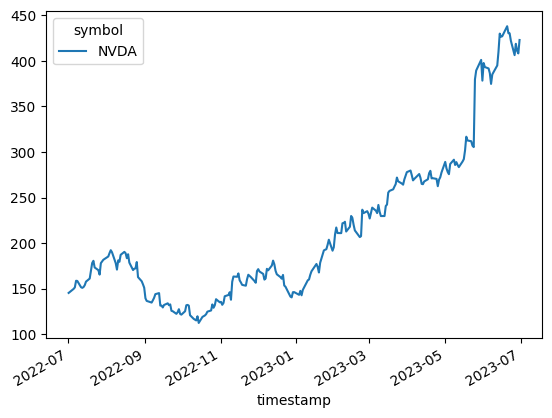

In [338]:
ticker = ['NVDA']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_6_2 = ticker_data.loc[:,["close"]]
stock_df_6_2 = ticker_data[["close","symbol"]]
stock_df_6_2 = stock_df_6_2.pivot(columns='symbol', values='close')
stock_df_6_2.plot()

ema_signals_df_6_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_6_2 ["EMA13"] = stock_df_6_2['NVDA'].ewm(span=short_window).mean()
ema_signals_df_6_2 ["EMA20"] = stock_df_6_2['NVDA'].ewm(span=middle_window).mean()
ema_signals_df_6_2 ["EMA100"] = stock_df_6_2['NVDA'].ewm(span=long_window).mean()
display(stock_df_6_2.head())
display(stock_df_6_2.tail())

ema_signals_df_6_2["Signal"] = 0.0
ema_signals_df_6_2["Signal"] = 0.0
ema_signals_df_6_2["Signal"][short_window:] = np.where(
    ema_signals_df_6_2["EMA13"][short_window:] > ema_signals_df_6_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_6_2["Signal"][short_window:] = np.where(
    ema_signals_df_6_2["EMA13"][short_window:] > ema_signals_df_6_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_6_2["Signal"][short_window:] = np.where(
    ema_signals_df_6_2["EMA20"][short_window:] > ema_signals_df_6_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_6_2["Entry/Exit"] = ema_signals_df_6_2["Signal"].diff()

ema_signals_df_6_2.head(2556)


initial_capital = float(14285)
share_size = 98

ema_signals_df_6_2["Position"] = share_size * ema_signals_df_6_2["Signal"]
ema_signals_df_6_2.tail(2556)

ema_signals_df_6_2["Entry/Exit Position"] = ema_signals_df_6_2["Position"].diff()
ema_signals_df_6_2.tail(2556)

ema_signals_df_6_2["Portfolio Holdings"] = ema_signals_df_6_2["close"] * ema_signals_df_6_2["Position"]
ema_signals_df_6_2.tail(2556)

ema_signals_df_6_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_6_2["close"] * ema_signals_df_6_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_6_2.tail(2556)

ema_signals_df_6_2["Portfolio Total"] = ema_signals_df_6_2["Portfolio Cash"] + ema_signals_df_6_2["Portfolio Holdings"]
ema_signals_df_6_2.tail(2556)

ema_signals_df_6_2["Portfolio Daily Returns"] = ema_signals_df_6_2["Portfolio Total"].pct_change()
ema_signals_df_6_2.tail(2556)


symbol,ALGN
timestamp,
2022-07-01 04:00:00+00:00,247.34
2022-07-05 04:00:00+00:00,254.11
2022-07-06 04:00:00+00:00,249.54
2022-07-07 04:00:00+00:00,259.64
2022-07-08 04:00:00+00:00,261.52


symbol,ALGN
timestamp,
2023-06-26 04:00:00+00:00,331.46
2023-06-27 04:00:00+00:00,340.69
2023-06-28 04:00:00+00:00,345.07
2023-06-29 04:00:00+00:00,341.79
2023-06-30 04:00:00+00:00,353.65


,close,EMA13,EMA20,EMA100,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns
timestamp,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,247.34,247.340000,247.340000,247.340000,0.0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2022-07-05 04:00:00+00:00,254.11,250.985385,250.894250,250.758850,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,NaN
2022-07-06 04:00:00+00:00,249.54,250.427717,250.396978,250.344414,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-07 04:00:00+00:00,259.64,253.287276,253.065295,252.738488,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
2022-07-08 04:00:00+00:00,261.52,255.476045,255.110416,254.565738,0.0,0.0,0.0,0.0,0.00,14285.00,14285.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,331.46,322.911123,318.130979,303.416163,1.0,0.0,47.0,0.0,15578.62,648.42,16227.04,0.007676
2023-06-27 04:00:00+00:00,340.69,325.450963,320.279457,304.159470,1.0,0.0,47.0,0.0,16012.43,648.42,16660.85,0.026734
2023-06-28 04:00:00+00:00,345.07,328.253682,322.640461,304.975186,1.0,0.0,47.0,0.0,16218.29,648.42,16866.71,0.012356


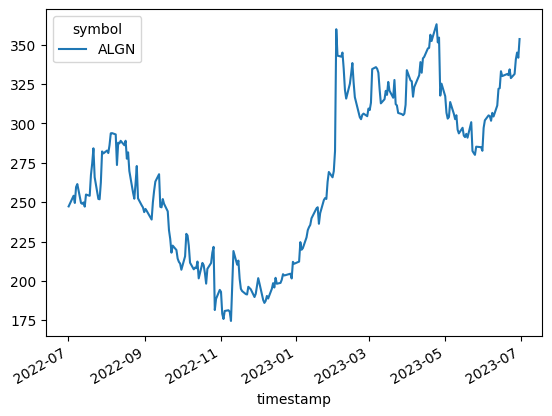

In [342]:
ticker = ['ALGN']

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

stock_df_7_2 = ticker_data.loc[:,["close"]]
stock_df_7_2 = ticker_data[["close","symbol"]]
stock_df_7_2 = stock_df_7_2.pivot(columns='symbol', values='close')
stock_df_7_2.plot()

ema_signals_df_7_2 = ticker_data.loc[:, ["close"]].copy()

short_window = 13
middle_window = 20
long_window = 100

ema_signals_df_7_2 ["EMA13"] = stock_df_7_2['ALGN'].ewm(span=short_window).mean()
ema_signals_df_7_2 ["EMA20"] = stock_df_7_2['ALGN'].ewm(span=middle_window).mean()
ema_signals_df_7_2["EMA100"] = stock_df_7_2['ALGN'].ewm(span=long_window).mean()
display(stock_df_7_2.head())
display(stock_df_7_2.tail())

ema_signals_df_7_2["Signal"] = 0.0
ema_signals_df_7_2["Signal"][short_window:] = np.where(
    ema_signals_df_7_2["EMA13"][short_window:] > ema_signals_df_7_2["EMA20"][short_window:], 1.0, 0.0
 )
ema_signals_df_7_2["Signal"][short_window:] = np.where(
    ema_signals_df_7_2["EMA13"][short_window:] > ema_signals_df_7_2["EMA100"][short_window:], 1.0, 0.0
)
ema_signals_df_7_2["Signal"][short_window:] = np.where(
    ema_signals_df_7_2["EMA20"][short_window:] > ema_signals_df_7_2["EMA100"][short_window:], 1.0, 0.0
)    
ema_signals_df_7_2["Entry/Exit"] = ema_signals_df_7_2["Signal"].diff()

ema_signals_df_7_2.head(2556)


initial_capital = float(14285)
share_size = 47

ema_signals_df_7_2["Position"] = share_size * ema_signals_df_7_2["Signal"]
ema_signals_df_7_2.tail(2556)

ema_signals_df_7_2["Entry/Exit Position"] = ema_signals_df_7_2["Position"].diff()
ema_signals_df_7_2.tail(2556)

ema_signals_df_7_2["Portfolio Holdings"] = ema_signals_df_7_2["close"] * ema_signals_df_7_2["Position"]
ema_signals_df_7_2.tail(2556)

ema_signals_df_7_2["Portfolio Cash"] = (
    initial_capital - (ema_signals_df_7_2["close"] * ema_signals_df_7_2["Entry/Exit Position"]).cumsum()
)
ema_signals_df_7_2.tail(2556)

ema_signals_df_7_2["Portfolio Total"] = ema_signals_df_7["Portfolio Cash"] + ema_signals_df_7["Portfolio Holdings"]
ema_signals_df_7_2.tail(2556)

ema_signals_df_7_2["Portfolio Daily Returns"] = ema_signals_df_7_2["Portfolio Total"].pct_change()
ema_signals_df_7_2.tail(2556)


In [344]:
sum_df = (
    ema_signals_df_1_2["Portfolio Cash"] + ema_signals_df_1_2["Portfolio Holdings"] +
    ema_signals_df_2_2["Portfolio Cash"] + ema_signals_df_2_2["Portfolio Holdings"] + 
    ema_signals_df_3_2["Portfolio Cash"] + ema_signals_df_3_2["Portfolio Holdings"] +
    ema_signals_df_4_2["Portfolio Cash"] + ema_signals_df_4_2["Portfolio Holdings"] +
    ema_signals_df_5_2["Portfolio Cash"] + ema_signals_df_5_2["Portfolio Holdings"] +
    ema_signals_df_6_2["Portfolio Cash"] + ema_signals_df_6_2["Portfolio Holdings"] +
    ema_signals_df_7_2["Portfolio Cash"] + ema_signals_df_7_2["Portfolio Holdings"]
)
print(sum_df)

timestamp
2022-07-01 04:00:00+00:00          NaN
2022-07-05 04:00:00+00:00     99995.00
2022-07-06 04:00:00+00:00     99995.00
2022-07-07 04:00:00+00:00     99995.00
2022-07-08 04:00:00+00:00     99995.00
                               ...    
2023-06-26 04:00:00+00:00    105850.25
2023-06-27 04:00:00+00:00    109894.02
2023-06-28 04:00:00+00:00    109496.54
2023-06-29 04:00:00+00:00    110546.60
2023-06-30 04:00:00+00:00    113349.24
Length: 251, dtype: float64
